# 1. Loading dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.formula.api as smf


In [4]:
df_original = pd.read_csv('Desktop/Thinkful/weatherHistory.csv')
df_original.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


# 2. Preliminary data exploration

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df_original.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
df_original.describe(include=['object'])

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 11:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


# 3. Missing Values

In [8]:
df_original.isnull().sum()*100/df_original.isnull().count()

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

We have missing values only in 'Precip Type' but we will not use it in our analysis.

# 4. EDA

Target variable is *temperature*. 
Explanatory variables: humidity, windspeed, windbearing, and pressure

In [9]:
import seaborn as sns

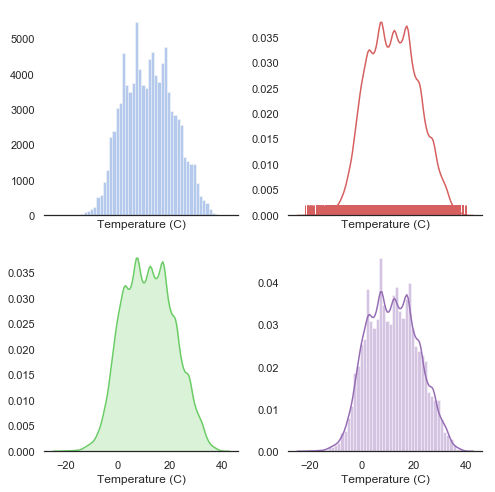

In [10]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate dataset
d = df_original['Temperature (C)']

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.tight_layout()

Text(0.5, 1.0, 'The distribution of temperature')

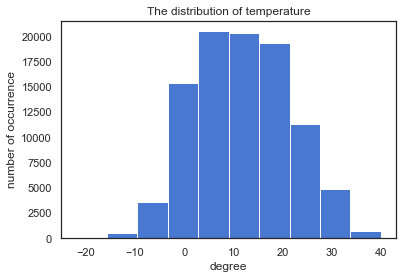

In [11]:
plt.hist(df_original['Temperature (C)'])

plt.xlabel("degree")
plt.ylabel("number of occurrence")
plt.title("The distribution of temperature")

In [12]:
df_original['Temperature (C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

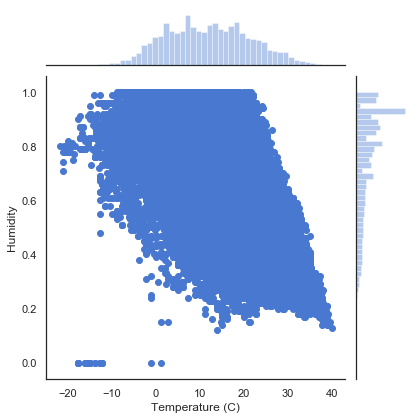

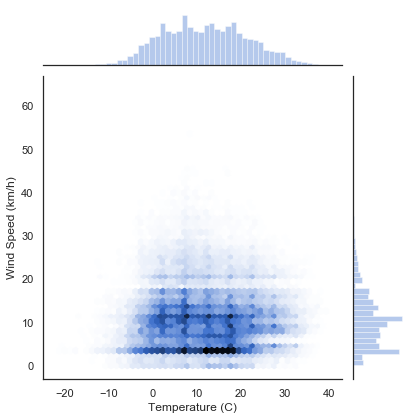

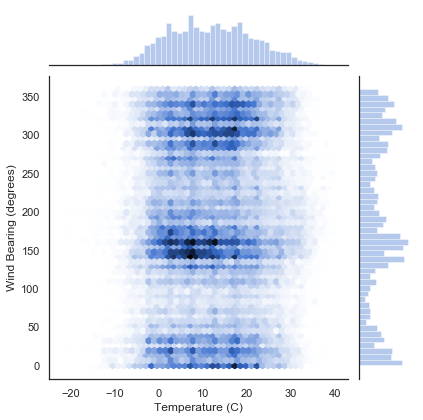

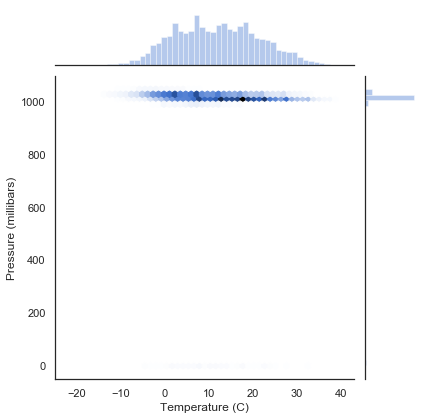

In [13]:
sns.jointplot(x=d, y="Humidity", data=df_original);
with sns.axes_style("white"):
    sns.jointplot(x=d, y="Wind Speed (km/h)", data = df_original, kind="hex");
with sns.axes_style("white"):
    sns.jointplot(x=d, y="Wind Bearing (degrees)", data = df_original, kind="hex");
with sns.axes_style("white"):
    sns.jointplot(x=d, y="Pressure (millibars)", data = df_original, kind="hex");
    


In [14]:
df = df_original.copy()


In [15]:
df = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]

In [16]:
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,1015.13
1,9.355556,0.86,14.2646,259.0,1015.63
2,9.377778,0.89,3.9284,204.0,1015.94
3,8.288889,0.83,14.1036,269.0,1016.41
4,8.755556,0.83,11.0446,259.0,1016.51


In [17]:
df.corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Temperature (C),1.000000,-0.632255,0.008957,0.029988,-0.005447
Humidity,-0.632255,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),0.008957,-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),0.029988,0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),-0.005447,0.005454,-0.049263,-0.011651,1.000000


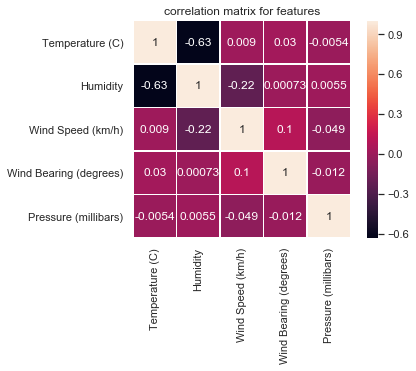

In [18]:
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix for features")
plt.show()

# 5. Building a regression model (estimation the model using OLS)

In [19]:
# Y is the target variable
Y = df['Temperature (C)']
# X is the feature set which includes
# is_male and is_smoker variables
X = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528533


LinearRegression()'s fit() method runs the OLS algorithm by default. Since we get the parameters using OLS, we can write our estimated model:

Temperature = 37.93 - 32.5*Humidity - 0.21 * Wind Speed + 0.004 * Wind Bearing - 0.00069 * Pressure

Now, we run the same model, this time using statsmodels. If you didn't install it already, you can run pip install statsmodels from the command line.



In [20]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:30:08   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 6. Meeting the assumptions of linear regression

Now we are going to check if our model meets the Gauss-Markov Conditions.

### Assumption one: linearity of the model in its coefficients

Temperature = 37.93 - 32.5*Humidity - 0.21 * Wind Speed + 0.004 * Wind Bearing - 0.00069 * Pressure

In [21]:
df['Temperature (C)'] = 37.93 - 32.5*df['Humidity'] - 0.21*df['Wind Speed (km/h)'] + 0.004 *df['Wind Bearing (degrees)']  - 0.00069 * df['Pressure (millibars)']

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']],df['Temperature (C)'])

# predictions of the linear regression
predictions = lrm_example.predict(df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)



Coefficients: 
 [-3.25e+01 -2.10e-01  4.00e-03 -6.90e-04]

Intercept: 
 37.92999999999996


### Assumption two: the error term should be zero on average

In [22]:
#lin_reg.resid.mean()
Y = df['Temperature (C)']
# X is the feature set which includes
# is_male and is_smoker variables
X = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)
predictions = lrm.predict(X)
errors = Y - predictions


print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 5.557113824351078e-15


### Assumption three: homoscedasticity

To investigate if the residuals are homoscedastic, we can look at a plot of residuals (or standardized residuals) vs. predicted (fitted) values. What should alarm us is the case when the residuals grow either as a function of predicted value or time (in case of time series).

We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them, the null hypothesis assumes homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

In the snippets below I plot residuals (and standardized ones) vs. fitted values and carry out the two mentioned tests. To identify homoscedasticity in the plots, the placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible — the red line in the R plots should be flat. We can see that this is not the case for our dataset.


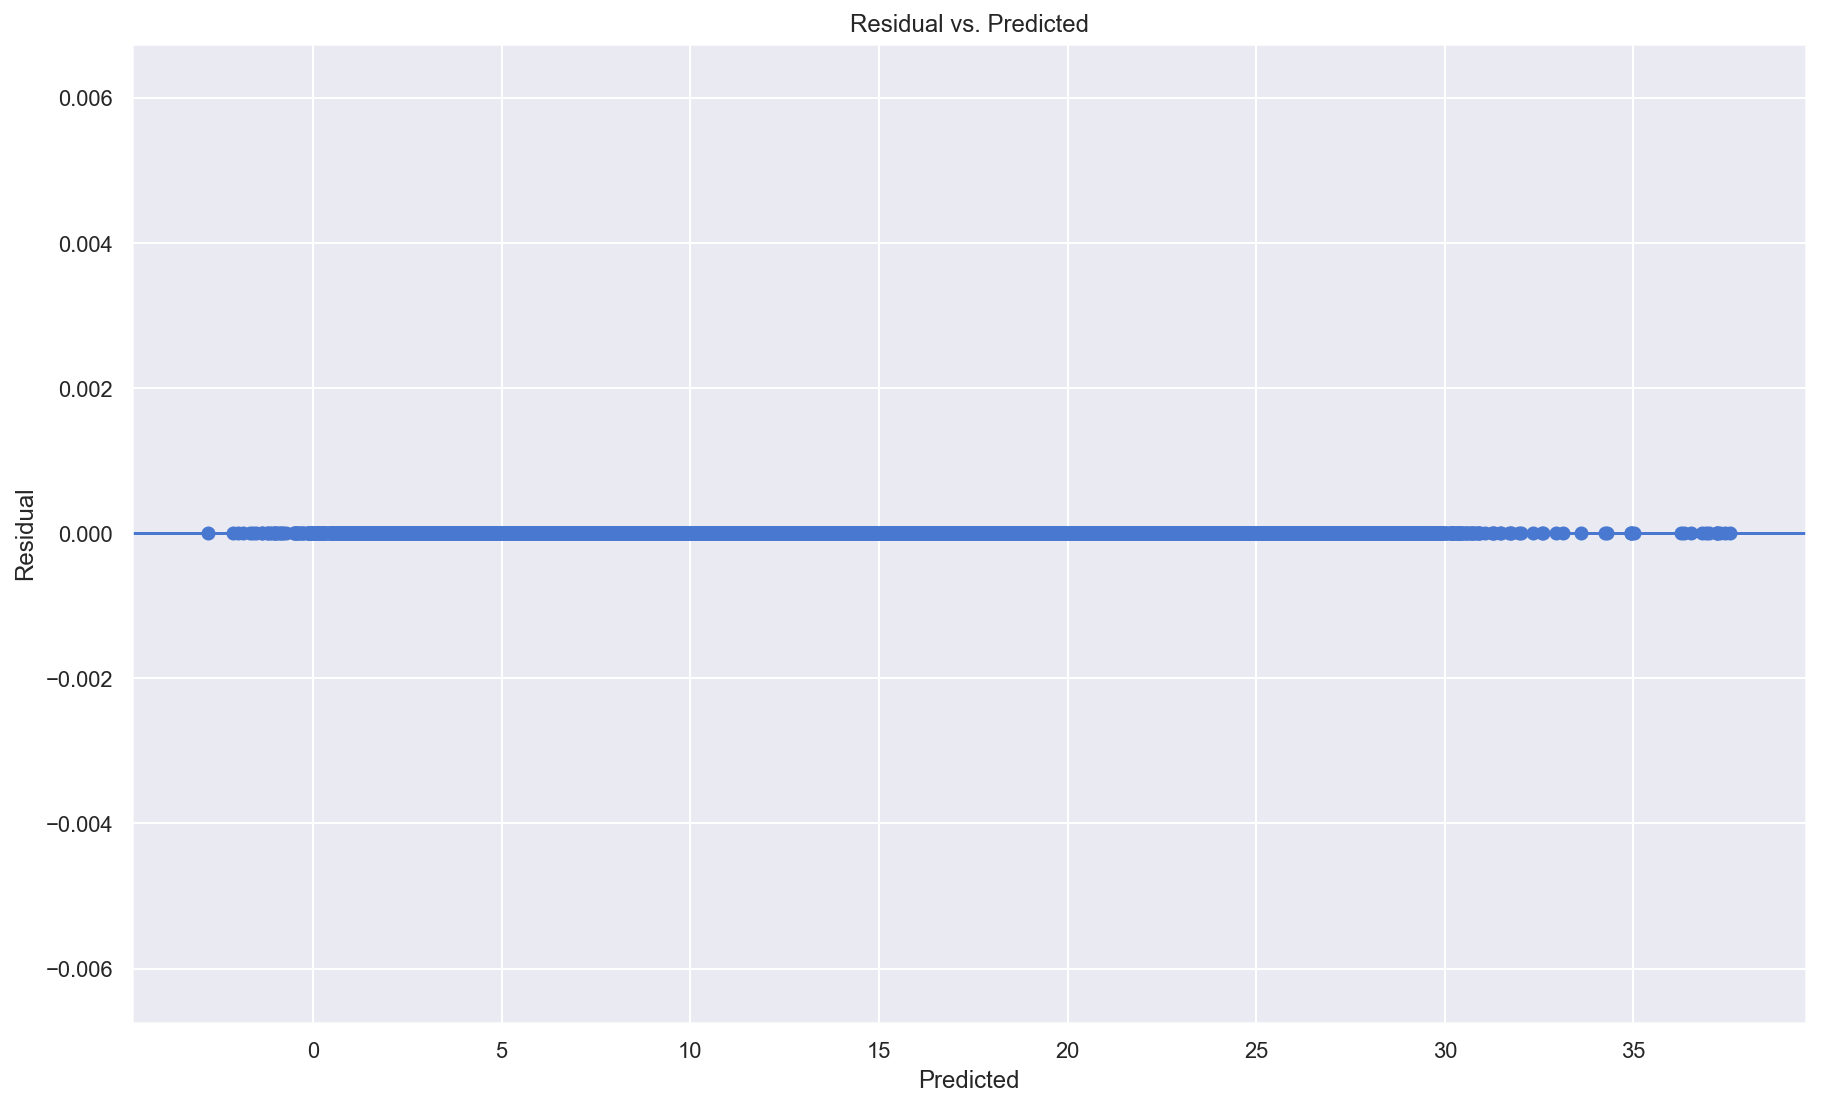

In [24]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



Here, we demonstrate two of them: Bartlett and Levene tests. The null hypothesis for both tests is that the errors are homoscedastic. Both tests can be imported from scipy's stats module.

In [25]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 6.46503e+06 and p value is 0
Levene test statistic value is 142158 and p value is 0


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

#### Potential solutions:
- log transformation of the dependent variable
- in case of time series, deflating a series if it concerns monetary value
- using ARCH (auto-regressive conditional heteroscedasticity) models to model the error variance. An example might be stock market, where data can exhibit periods of increased or decreased volatility over time (volatility clustering, see this article for more information)

### Assumption four: low multicollinearity

If there is correlation of 1 or -1 between a variable and another or several variables, this is called perfect multicollinearity. 

Text(0.5, 1.0, 'Correlation matrix')

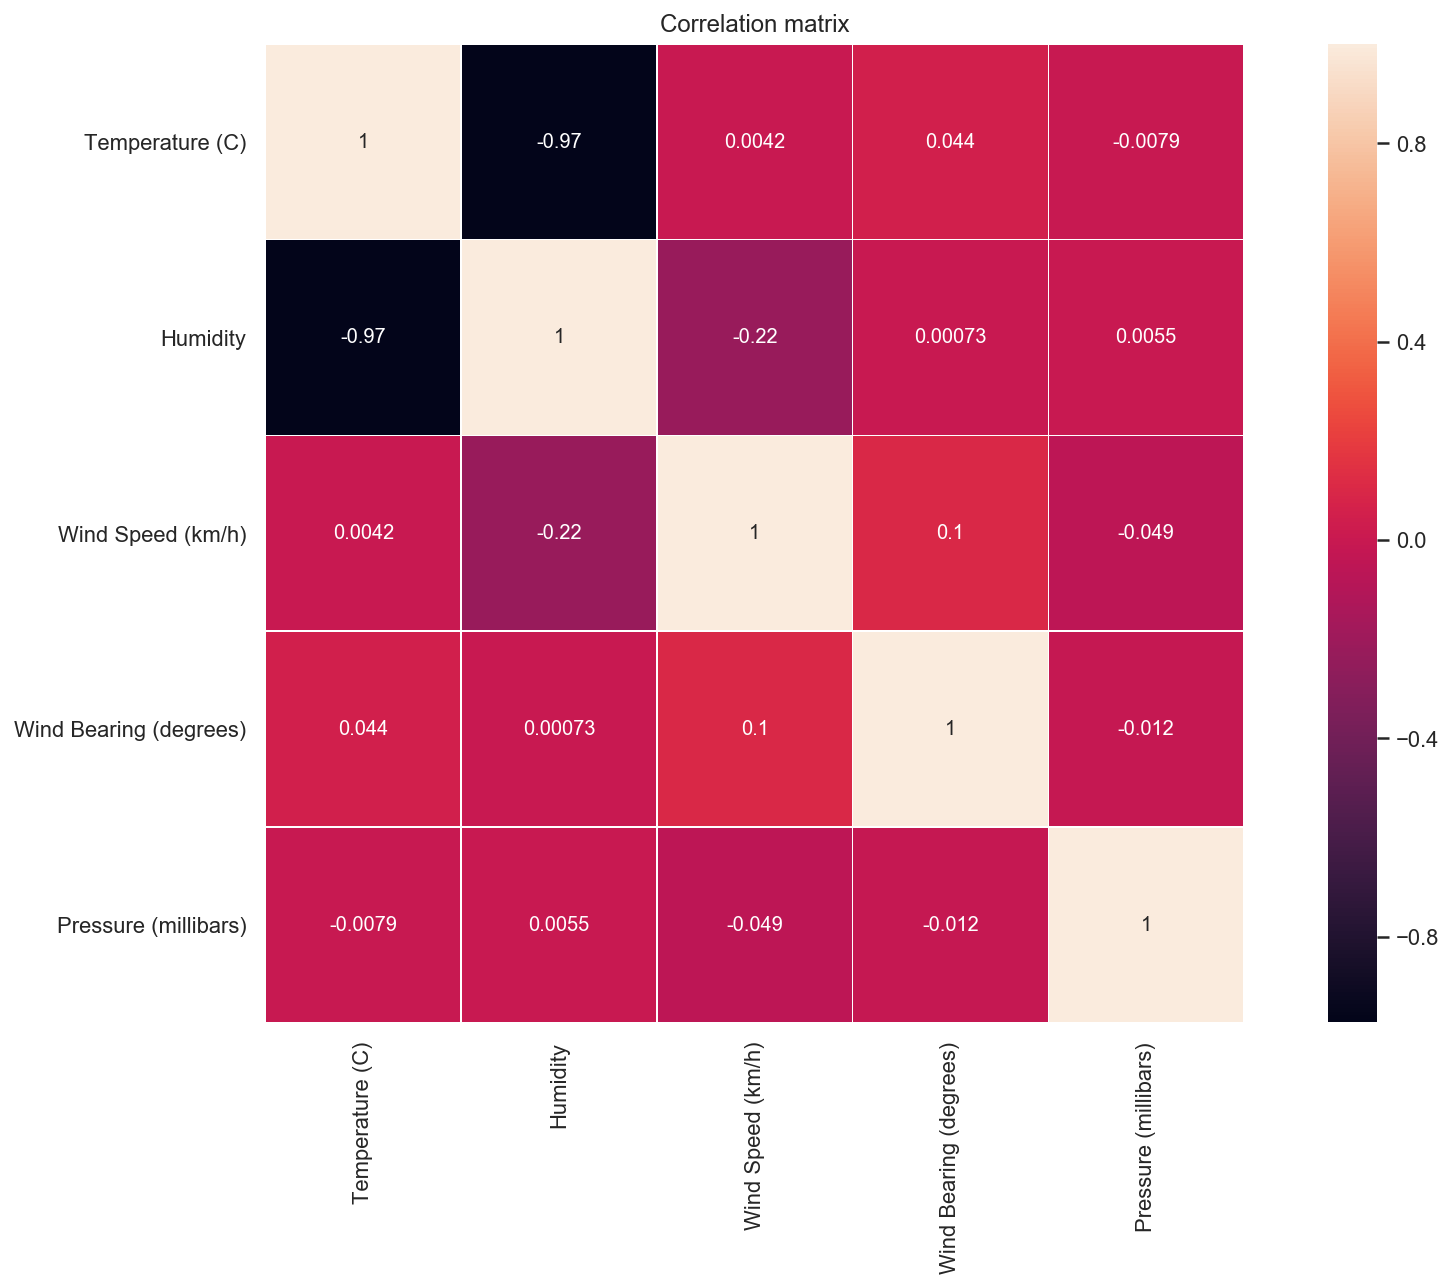

In [26]:
sns.heatmap(df.corr(), annot = True, linewidths = .3, square = True)
plt.title('Correlation matrix')

### Assumption five: error terms should be uncorrelated with one another

In other words, the error term for one observation shouldn't predict the error term for another. To identify whether the error terms are correlated with each other or not, we can graph them. In the graph, we need to observe randomness.

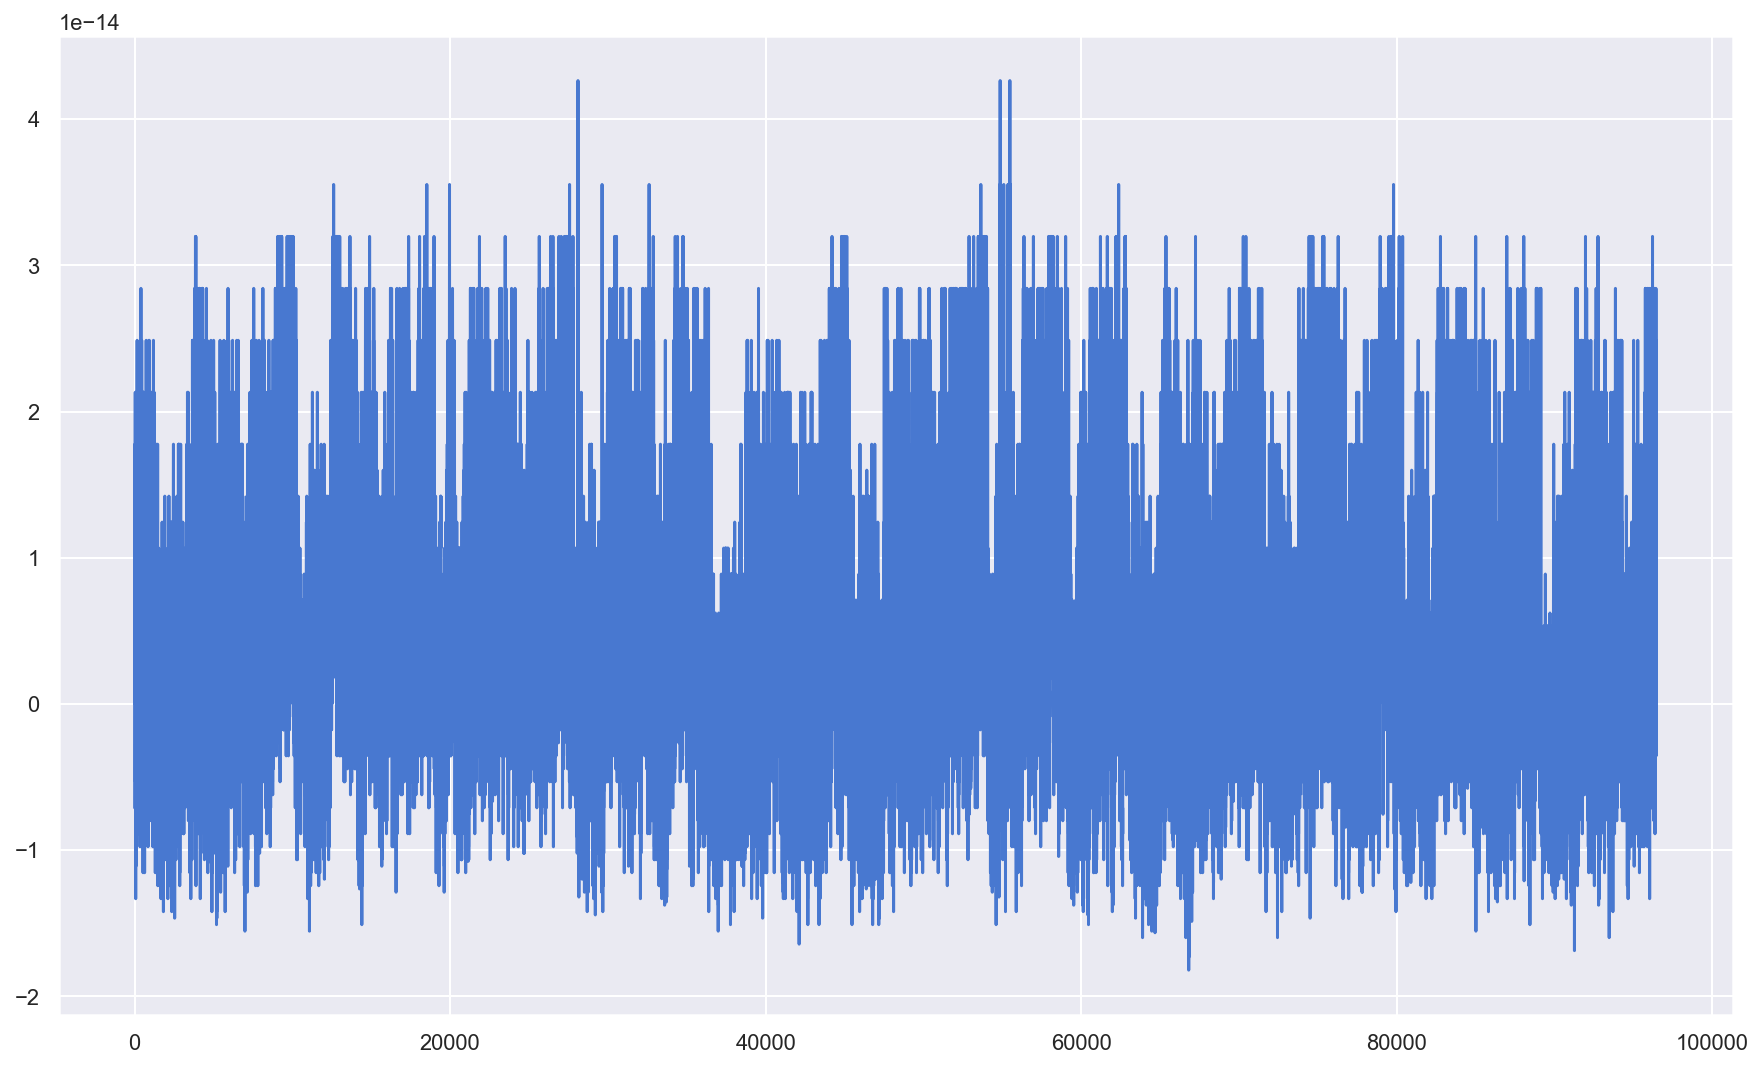

In [27]:
plt.plot(errors)

Another way to look at correlations between errors is to use the autocorrelation function. This function computes the correlation of a variable with itself. In our case, the order of the errors are the orders of the observations.

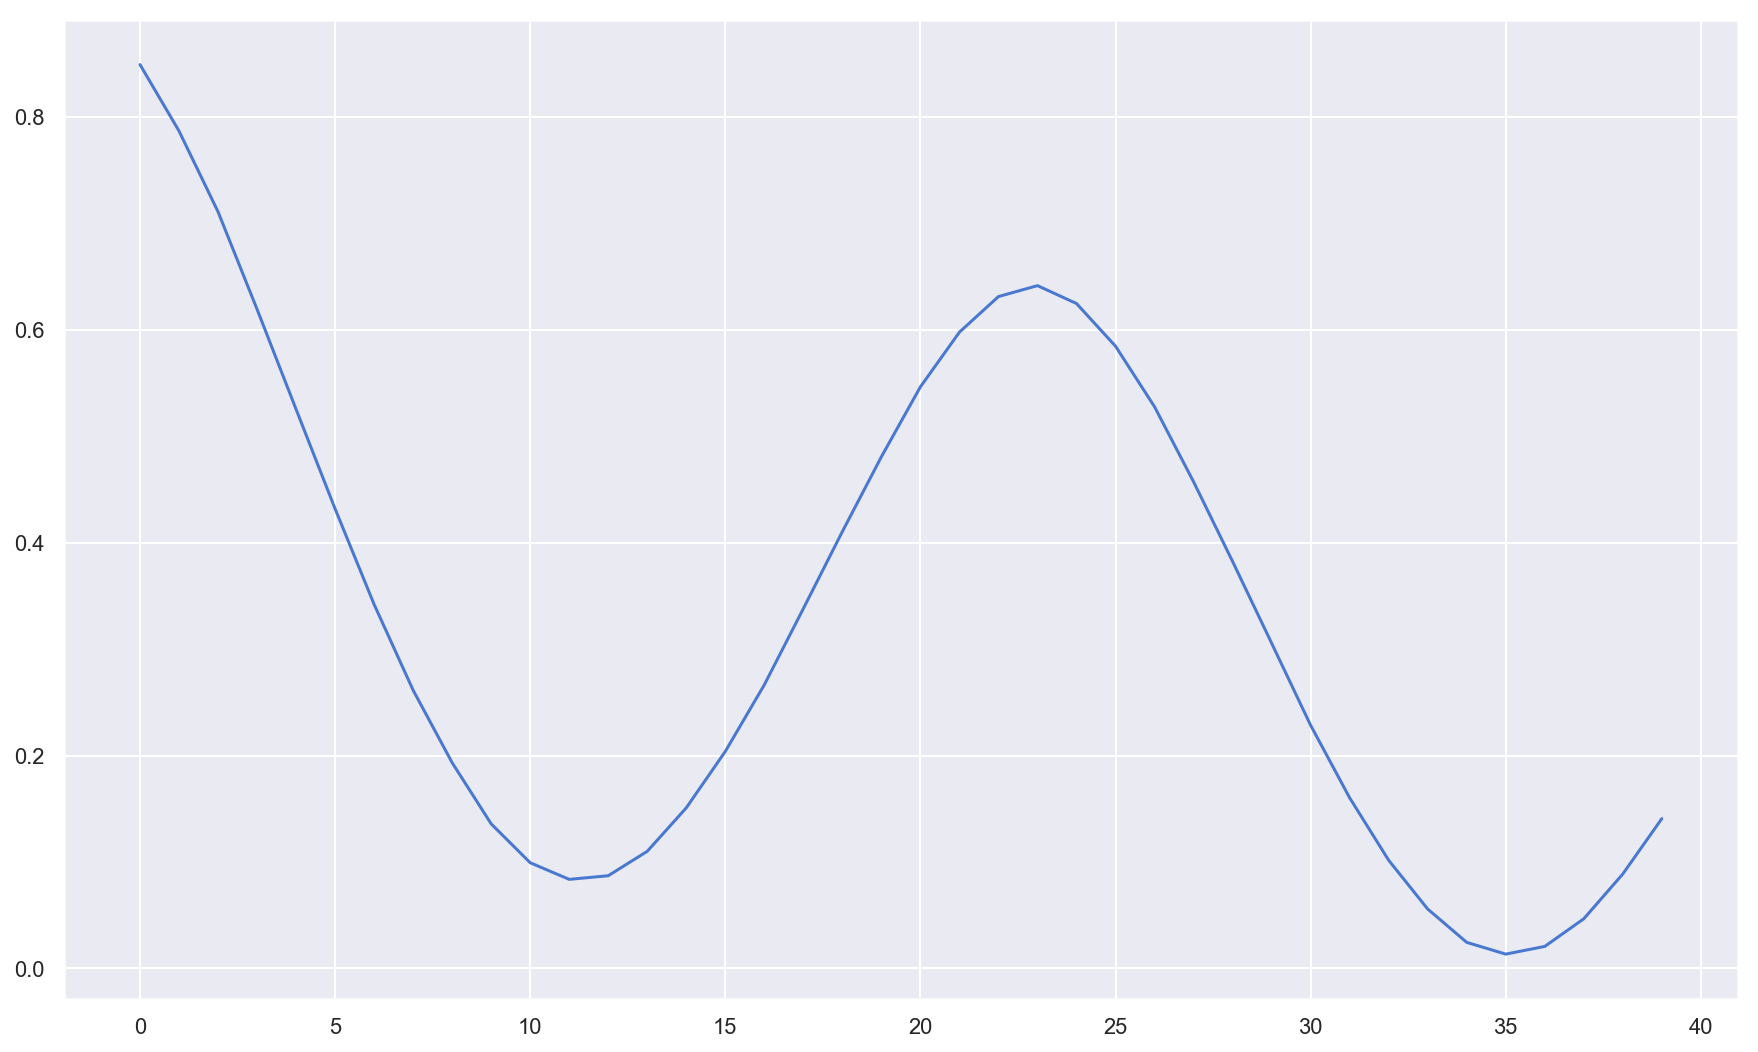

In [28]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


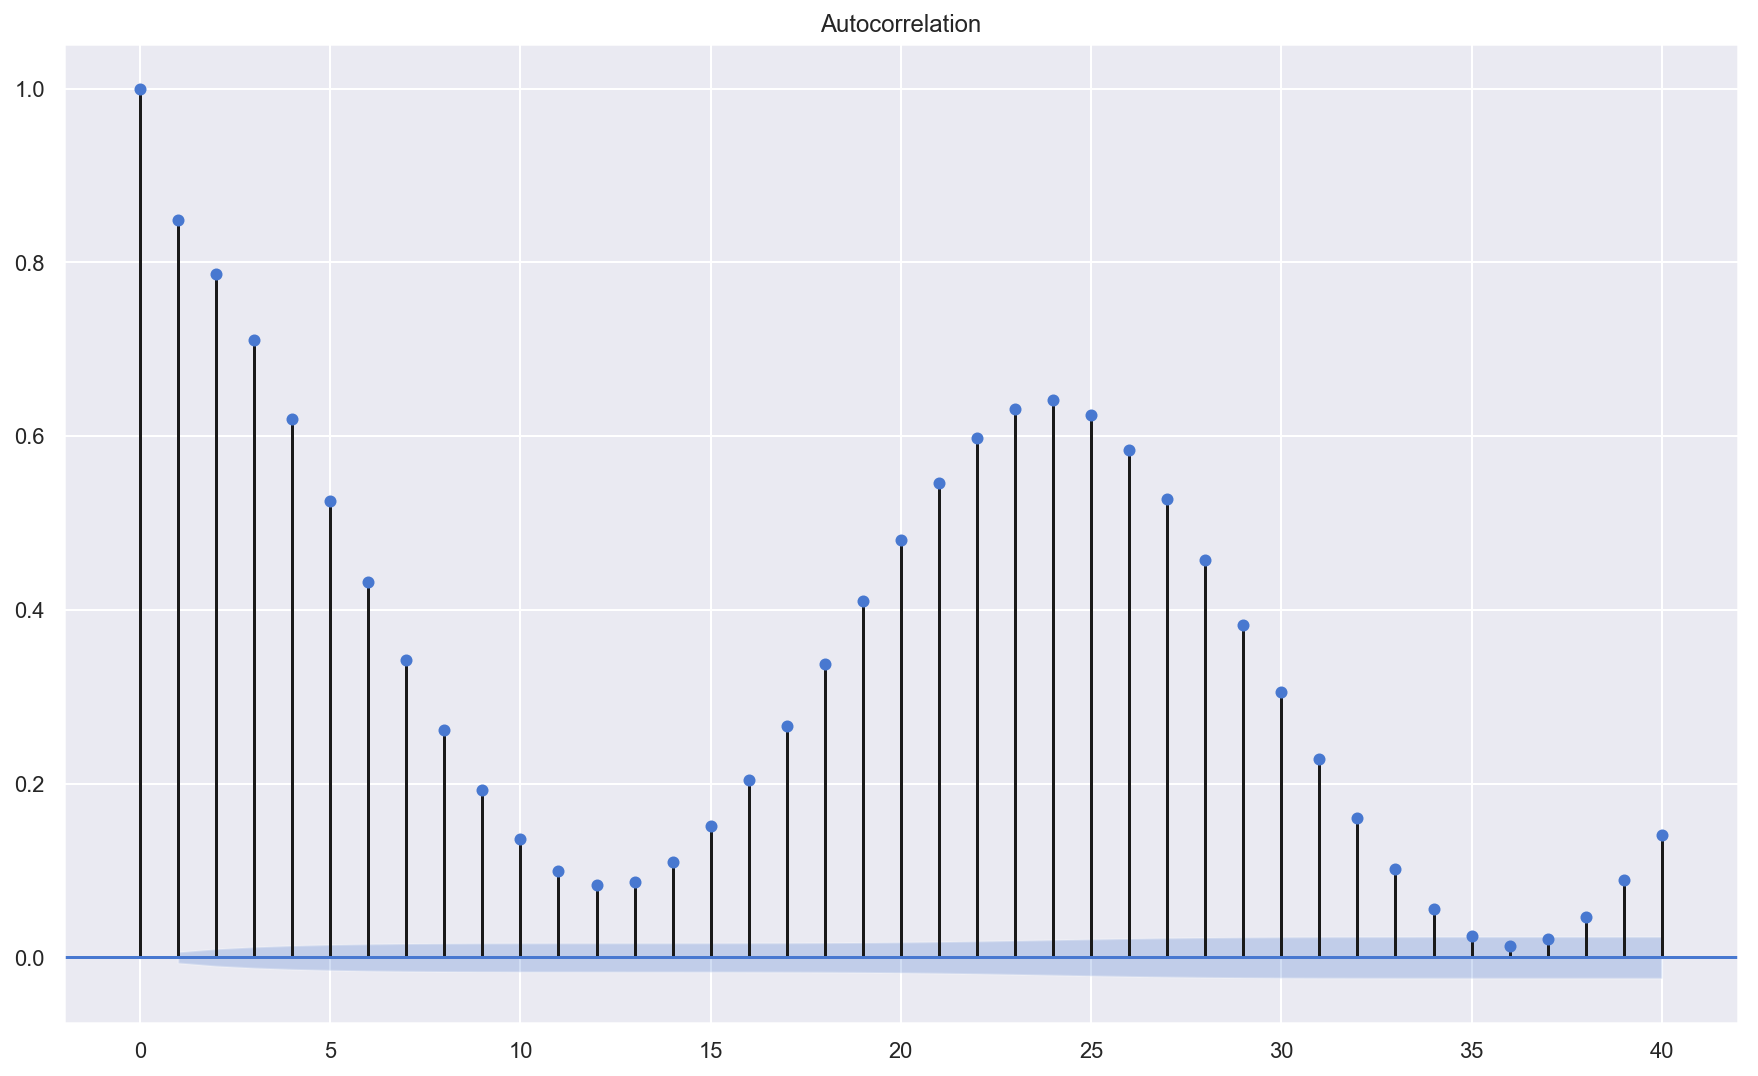

In [29]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(errors, lags=40 , alpha=0.05)
acf.show()

### Assumption six: features shouldn't be correlated with the errors

To investigate this assumption I check the Pearson correlation coefficient between each feature and the residuals. Then report the p-value for testing the lack of correlation between the two considered series.

In [30]:
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], errors)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')


Variable: Humidity --- correlation: -0.9294, p-value: 0.0000
Variable: Wind Speed (km/h) --- correlation: 0.0382, p-value: 0.0000
Variable: Wind Bearing (degrees) --- correlation: -0.0318, p-value: 0.0000
Variable: Pressure (millibars) --- correlation: -0.0387, p-value: 0.0000


p-value = 0 so we can reject the null hypothesis (lack of correlation) for any pair.

### Assumption 7: normality of the errors

Text(0.5, 1.0, 'Histogram of the errors')

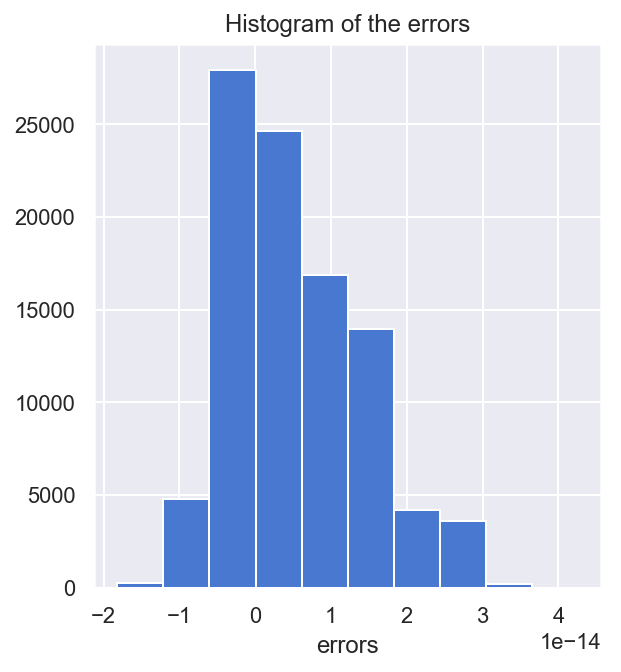

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")



Jarque-Bera test statistics is 6335.310015164171 and p value is 0.0
Normality test statistics is 5448.821953973503 and p value is 0.0


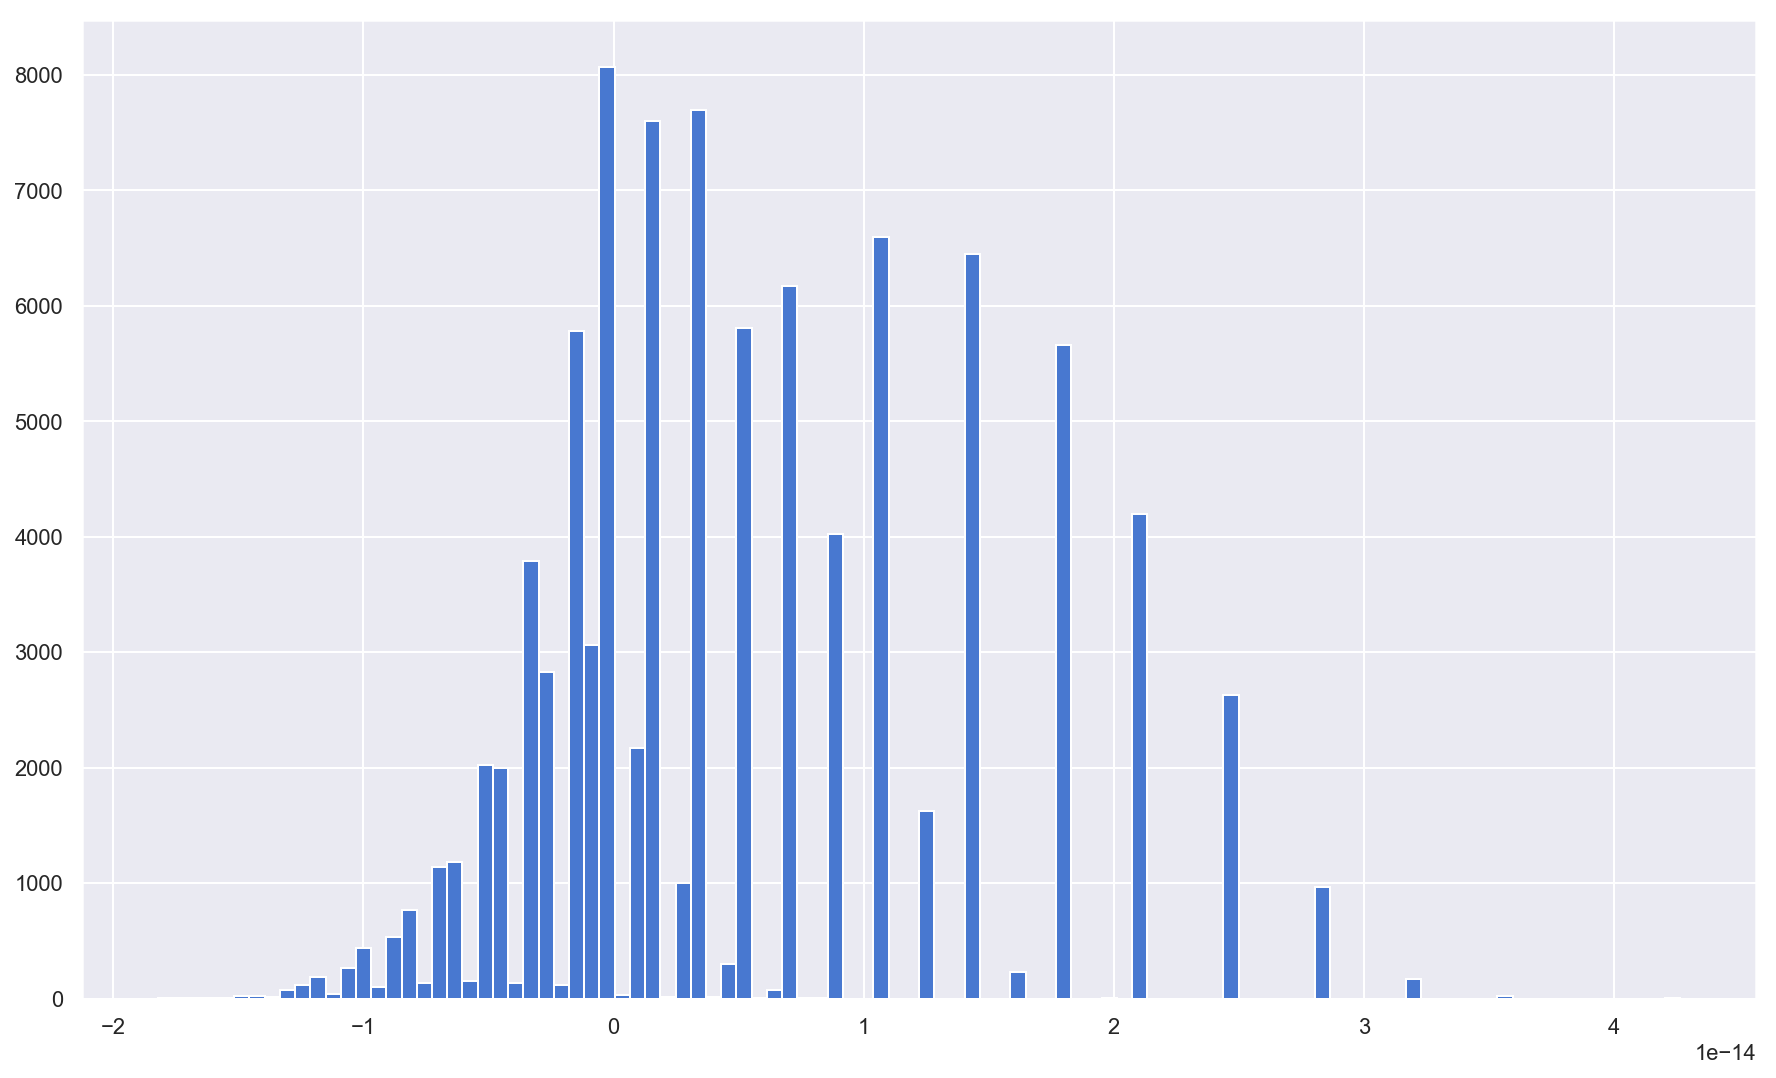

In [34]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

# Test whether distribution is Normal
# Null Hypo: Distribution is normal
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)
print(f"Jarque-Bera test statistics is {jb_stats[0]} and p value is {jb_stats[1]}")
print(f"Normality test statistics is {norm_stats[0]} and p value is {norm_stats[1]}")

# Plot distribution
plt.hist(errors, bins=100)
plt.show()

The p-values of both tests indicate that our errors are not normally distributed. Visually it looks terrible.